<a href="https://colab.research.google.com/github/faustocristiano/Contador-de-palavras-repetidas/blob/master/M3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title ###Importando bibliotecas necessárias

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema


Mounted at /content/drive


In [ ]:
# @title ###Código

# Definir o número máximo de linhas do DataFrame
max_rows = 1000

# Ler o arquivo CSV e armazenar os dados em um DataFrame
df = pd.read_csv('/content/drive/Shareddrives/2023 - INSIGHTS - IFSC+Sensorweb/Datasets Sensorweb/Dados_brutos_temp_limpos/VEI (11)_limpo.csv', usecols=['Iniciado em', 'Valor'], nrows=max_rows)


# Converter a coluna 'Iniciado em' para o tipo datetime
df['Iniciado em'] = pd.to_datetime(df['Iniciado em'])

# Ordenar o DataFrame pela coluna 'Iniciado em'
df = df.sort_values('Iniciado em')

# Definir a janela de 1 dia
janela = pd.DateOffset(days=1)

# Listas para armazenar as temperaturas e os limites
temperaturas = []
limites_inferiores = []
limites_superiores = []
temperaturas_anomalias = []

# Iterar sobre o DataFrame
for i, row in df.iterrows():
    data_atual = row['Iniciado em']
    temperatura_atual = row['Valor']
    
    # Filtrar os dados dentro da janela de 1 dia
    dados_janela = df[(df['Iniciado em'] >= data_atual - janela) & (df['Iniciado em'] <= data_atual + janela)]
    
    # Calcular os limites esperados para a temperatura dentro da janela 
    limite_inferior = (dados_janela['Valor'].mean() -  dados_janela['Valor'].std())*0.9
    limite_superior = (dados_janela['Valor'].mean() + dados_janela['Valor'].std())*1.1
    amplitude1 = dados_janela['Valor'].max() - dados_janela['Valor'].min()

    amplitude=limite_superior-limite_inferior
    print(amplitude)
    print(amplitude1)

    # Armazenar as temperaturas e os limites
    temperaturas.append(temperatura_atual)
    limites_inferiores.append(limite_inferior)
    limites_superiores.append(limite_superior)
    # Verificar se a temperatura atual está fora dos limites
# Verificar se a temperatura atual está fora dos limites
# Verificar se a temperatura atual está fora dos limites
    if temperatura_atual < limite_inferior or temperatura_atual > limite_superior:

        temperaturas_anomalias.append(temperatura_atual)
        print(f"A temperatura em {data_atual} está fora dos limites esperados.")
       # print((temperatura_atual))
       # print((limite_inferior) )
       # print( (limite_superior))
        
    else:
        temperaturas_anomalias.append(None)
       


# Plotar o resultado
plt.figure(figsize=(12, 6))
plt.plot(df['Iniciado em'], temperaturas, label='Temperatura')
plt.plot(df['Iniciado em'], limites_inferiores, 'r--', label='Limite Inferior')
plt.plot(df['Iniciado em'], limites_superiores, 'g--', label='Limite Superior')
plt.plot(df['Iniciado em'], temperaturas_anomalias, 'ro', label='Anomalia')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.title('Análise de Temperatura')
plt.legend()
plt.grid(True)
plt.show()


[5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375, 5.3993824339070375,

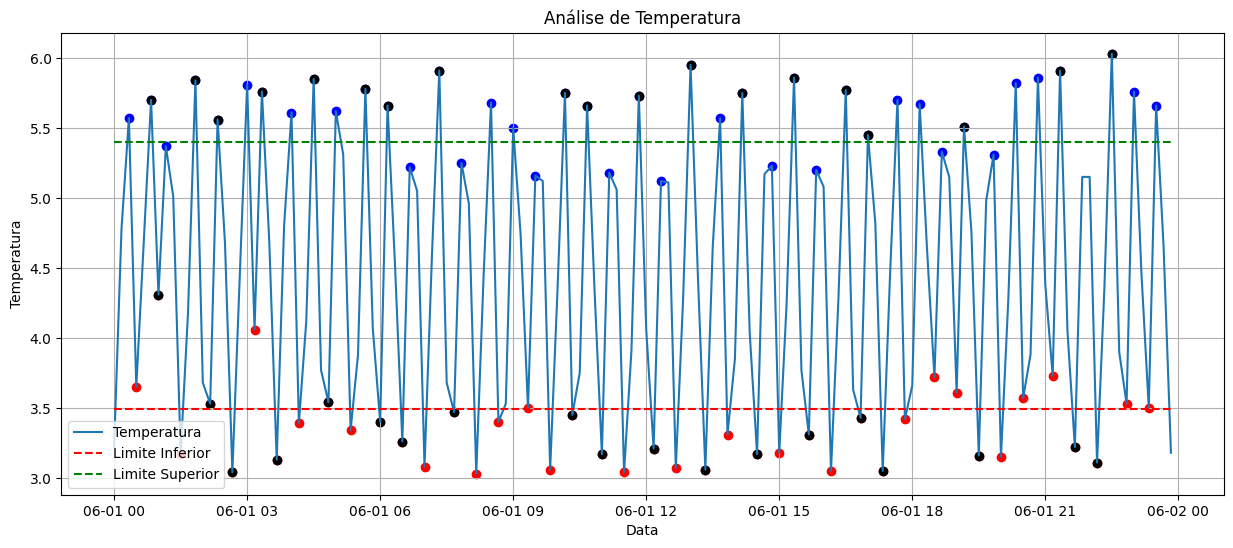

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir o número máximo de linhas do DataFrame
max_rows = 144

# Ler o arquivo CSV e armazenar os dados em um DataFrame
df = pd.read_csv('/content/drive/Shareddrives/2023 - INSIGHTS - IFSC+Sensorweb/Datasets Sensorweb/Dados_brutos_temp_limpos_resample/GEL (14)_limpo_resample.csv', usecols=['Iniciado em', 'Valor'], nrows=max_rows)

# Converter a coluna 'Iniciado em' para o tipo datetime
df['Iniciado em'] = pd.to_datetime(df['Iniciado em'])

# Ordenar o DataFrame pela coluna 'Iniciado em'
df = df.sort_values('Iniciado em')

# Definir a janela de 4 horas
janela = pd.DateOffset(hours=24)

# Listas para armazenar as temperaturas e os limites
temperaturas = []
limites_inferiores = []
limites_superiores = []

# Iterar sobre o DataFrame
for i, row in df.iterrows():
    data_atual = row['Iniciado em']
    temperatura_atual = row['Valor']
    
    # Filtrar os dados dentro da janela de 4 horas
    dados_janela = df[(df['Iniciado em'] >= data_atual - janela) & (df['Iniciado em'] <= data_atual + janela)]
    
    # Calcular os limites esperados para a temperatura dentro da janela 
    limite_inferior = (dados_janela['Valor'].mean() - dados_janela['Valor'].std()) 
    limite_superior = (dados_janela['Valor'].mean() + dados_janela['Valor'].std()) 

    # Armazenar as temperaturas e os limites
    temperaturas.append(temperatura_atual)
    limites_inferiores.append(limite_inferior)
    limites_superiores.append(limite_superior)

# Identificar os picos inferiores e superiores (cristas e vales)
picos_inferiores = []
picos_superiores = []

for i in range(1, len(temperaturas)-1):
    temperatura_atual = temperaturas[i]
    temperatura_anterior = temperaturas[i-1]
    temperatura_proxima = temperaturas[i+1]
    
    if temperatura_atual < temperatura_anterior and temperatura_atual < temperatura_proxima:
        picos_inferiores.append(i)
    elif temperatura_atual > temperatura_anterior and temperatura_atual > temperatura_proxima:
        picos_superiores.append(i)

# Calcular a amplitude média dos limites dentro da janela de 4 horas
amplitude_media = np.mean(np.array(limites_superiores) - np.array(limites_inferiores))
print(limites_superiores)
print(limites_inferiores)
print(amplitude_media)
indices_picos_diferentes = []

for i in range(len(picos_inferiores)):
    pico_inferior = temperaturas[picos_inferiores[i]]
    
    # Verificar se o índice está dentro dos limites da lista picos_superiores
    if i < len(picos_superiores):
        pico_superior = temperaturas[picos_superiores[i]]
        amplitude_pico = pico_superior - pico_inferior

        if amplitude_pico > 1.2 * amplitude_media or amplitude_pico < 0.8 * amplitude_media:
            indices_picos_diferentes.append(picos_inferiores[i])
            indices_picos_diferentes.append(picos_superiores[i])

# Plotar o resultado
plt.figure(figsize=(15, 6))
plt.plot(df['Iniciado em'], temperaturas, label='Temperatura')
plt.plot(df['Iniciado em'], limites_inferiores, 'r--', label='Limite Inferior')
plt.plot(df['Iniciado em'], limites_superiores, 'g--', label='Limite Superior')

# Plotar os picos inferiores como pontos vermelhos
for i in picos_inferiores:
    plt.scatter(df['Iniciado em'].iloc[i], temperaturas[i], color='red', marker='o')

# Plotar os picos superiores como pontos azuis
for i in picos_superiores:
    plt.scatter(df['Iniciado em'].iloc[i], temperaturas[i], color='blue', marker='o')

# Plotar os picos com amplitude diferente como pontos pretos
for i in indices_picos_diferentes:
    plt.scatter(df['Iniciado em'].iloc[i], temperaturas[i], color='black', marker='o')

plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.title('Análise de Temperatura')
plt.legend()
plt.grid(True)
plt.show()
